In [1]:
#Importar las librerias necesarias
# Procesar la informacion
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Regresion Logistica
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Evaluacion del Modelo
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
# Cargar el dataset
hoja1 = pd.read_excel('CultivoAntioquia.xlsx', 'Parte01')
hoja2 = pd.read_excel('CultivoAntioquia.xlsx', 'Parte02')

df = pd.merge(hoja1, hoja2[['Id', 'PetalLengthCm', 'PetalWidthCm', 'Species']], on='Id')

In [8]:
# Obtener información de dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [9]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# **Limpieza y transformación de los datos**

In [14]:
# Eliminar las filas con valores nulos
df = df.dropna()

In [15]:
# Obtenerinformación
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [18]:
# Conversión de etiquetas

# Reemplazar la columna Species por números
df['Species'] = df['Species'].replace('Iris-setosa', 0)
df['Species'] = df['Species'].replace('Iris-versicolor', 1)
df['Species'] = df['Species'].replace('Iris-virginica', 2)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


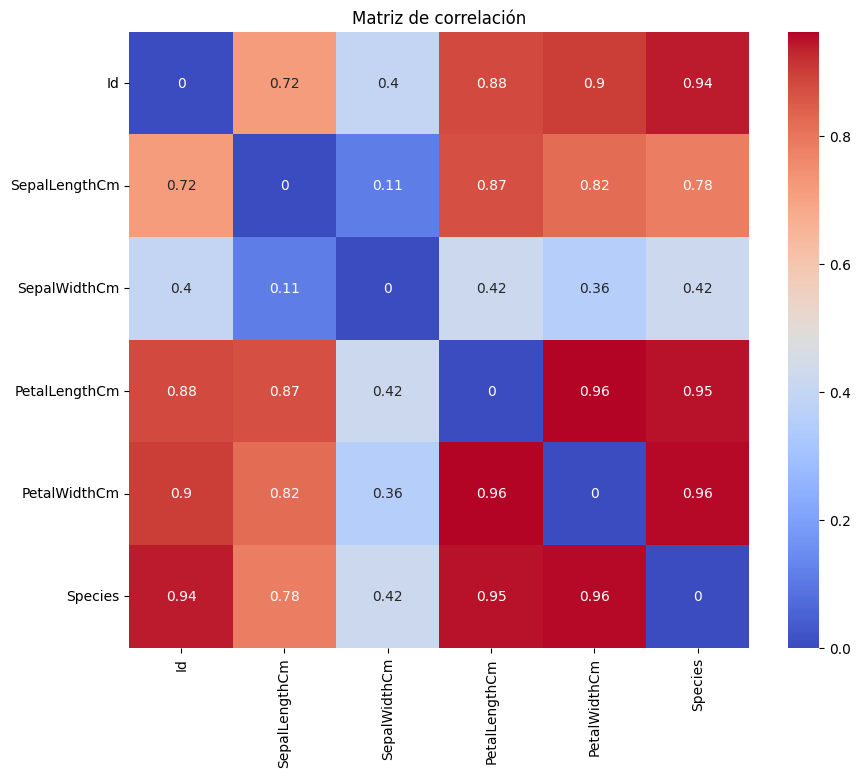

In [19]:
# Calcular la matriz de correlación de todas las variables
correlation_matriz = df.corr().abs()

# Excluir la diagonal
np.fill_diagonal(correlation_matriz.values, 0)

# Obtener las variables
most_correlated = correlation_matriz.unstack().sort_values(ascending=False).drop_duplicates()

# Visualizar las variables más correlacionadas
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matriz, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [20]:
# Imprimir las variables más correlacionas
for (var1, var2), correlacion in most_correlated.items():
  print(f"Las variables '{var1}' y '{var2}' tienen una correlación de {correlacion}.")

Las variables 'PetalWidthCm' y 'PetalLengthCm' tienen una correlación de 0.9627570970509662.
Las variables 'PetalWidthCm' y 'Species' tienen una correlación de 0.9564638238016178.
Las variables 'Species' y 'PetalLengthCm' tienen una correlación de 0.9490425448523334.
Las variables 'Id' y 'Species' tienen una correlación de 0.9428299935925013.
Las variables 'PetalWidthCm' y 'Id' tienen una correlación de 0.8997585770933499.
Las variables 'PetalLengthCm' y 'Id' tienen una correlación de 0.8827473181390557.
Las variables 'SepalLengthCm' y 'PetalLengthCm' tienen una correlación de 0.8717541573048716.
Las variables 'SepalLengthCm' y 'PetalWidthCm' tienen una correlación de 0.8179536333691642.
Las variables 'SepalLengthCm' y 'Species' tienen una correlación de 0.7825612318100821.
Las variables 'SepalLengthCm' y 'Id' tienen una correlación de 0.7166762728539005.
Las variables 'PetalLengthCm' y 'SepalWidthCm' tienen una correlación de 0.4205160964011539.
Las variables 'Species' y 'SepalWidthCm

In [21]:
#Eliminar las columnas que no se correlacionan
df = df.drop(['Id'], axis=1)

In [22]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# **Entrenamiento de un modelo de regresión**

In [23]:
# Seleccionar las variables relevantes para la regresión
variables = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

X = df[variables]
y = df['Species']

In [24]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Escalar caracteristicas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Crear el modelo de regresión lineal
model = LogisticRegression(max_iter=1000)

In [27]:
# Entrenar el modelo
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [28]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# **Evaluación del modelo**


In [29]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo: %.2f' % accuracy)

Precisión del modelo: 1.00


In [30]:
# Calcular la matriz de confución
conf_matriz = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(conf_matriz)

Matriz de confusión:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# **Predicción futura**

In [31]:
# Valores futuros
SepalLengthCm = 4.8
SepalWidthCm = 3.7
PetalLengthCm = 1.5
PetalWidthCm = 0.2

In [32]:
# Realizar una predicción de probalidades para la predicción futura
pred_probabilities = model.predict_proba([[SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm]])

# Obtener los nombres de las clases
class_names = model.classes_

#  Imprimir las probabilidades de cada clase para la predicción futura
for i, class_name in enumerate(class_names):
  prob = pred_probabilities[0, i] * 100
  print(f"Probabilidad de {class_name}: {round(prob, 2)}%")

Probabilidad de 0: 0.11%
Probabilidad de 1: 86.22%
Probabilidad de 2: 13.67%


# **Guardar el modelo entrenado y  ajustado**

In [33]:
import pickle

# Guardar el modelo en un archivo
with open('modelo_regresion.pkl', 'wb') as file:
  pickle.dump(model, file)